In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Defining the feature and dependent variables
X_test = test
X_train = train.drop('Survived', axis = 1)
y_train = train.iloc[:, 1].values

In [4]:
#Setting Indexes
X_test = X_test.set_index('PassengerId')
X_train = X_train.set_index('PassengerId')

In [5]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Splitting Name Column (Training Set, then Test Set)
foo = lambda x: pd.Series([i for i in reversed(x.split(','))])
split_names_train = X_train['Name'].apply(foo)
split_names_train.rename(columns={0:'Rest',1:'Surname'},inplace=True)
split_names_train = split_names_train[['Surname','Rest']]

foo1 = lambda x: pd.Series([i for i in reversed(x.split(','))])
split_names_test = X_test['Name'].apply(foo1)
split_names_test.rename(columns={0:'Rest',1:'Surname'},inplace=True)
split_names_test = split_names_test[['Surname','Rest']]

#Second Split in Name Column (Training Set, then Test Set)
foo = lambda x: pd.Series([i for i in reversed(x.split('.'))])
split_names2_train = split_names_train['Rest'].apply(foo)
split_names2_train.rename(columns={0:'Rest',1:'Title'},inplace=True)
split_names2_train = split_names2_train[['Title','Rest']]


foo1 = lambda x: pd.Series([i for i in reversed(x.split('.'))])
split_names2_test = split_names_test['Rest'].apply(foo1)
split_names2_test.rename(columns={0:'Rest',1:'Title'},inplace=True)
split_names2_test = split_names2_test[['Title','Rest']]


In [7]:
#Combining the 2 Dataframes into 1 with 3 columns 
Names_train = split_names_train
Names_train['Title'] = split_names2_train['Title']
Names_train['Rest'] = split_names2_train['Rest']

Names_test = split_names_test
Names_test['Title'] = split_names2_test['Title']
Names_test['Rest'] = split_names2_test['Rest']

In [8]:
#Add Name Columns to X_train, X_test
X_train[['Surname', 'Rest', 'Title']] = Names_train[['Surname', 'Rest', 'Title']]
X_test[['Surname', 'Rest', 'Title']] = Names_test[['Surname', 'Rest', 'Title']]

In [9]:
#taking care of missing data
#Fill Embarked using forward fill 
X_train['Embarked'] = X_train['Embarked'].fillna(method = 'ffill')
X_test['Embarked'] = X_test['Embarked'].fillna(method = 'ffill')

In [10]:
#Label Encoder for Categorical Data (Sex, Embarked)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Sex = LabelEncoder()
labelencoder_Embarked = LabelEncoder()  

X_train['Sex'] = labelencoder_Sex.fit_transform(X_train['Sex'])
X_test['Sex'] = labelencoder_Sex.fit_transform(X_test['Sex'])
X_train['Embarked'] = labelencoder_Embarked.fit_transform(X_train['Embarked'])
X_test['Embarked'] = labelencoder_Embarked.fit_transform(X_test['Embarked'])


<function matplotlib.pyplot.show(*args, **kw)>

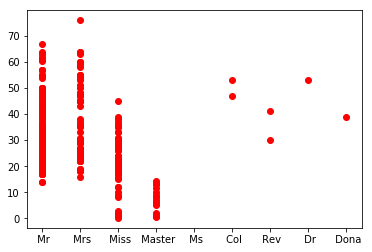

In [11]:
#Plot Title vs Age
plt.scatter(X_test['Title'], X_test['Age'], c = 'r') 
plt.show

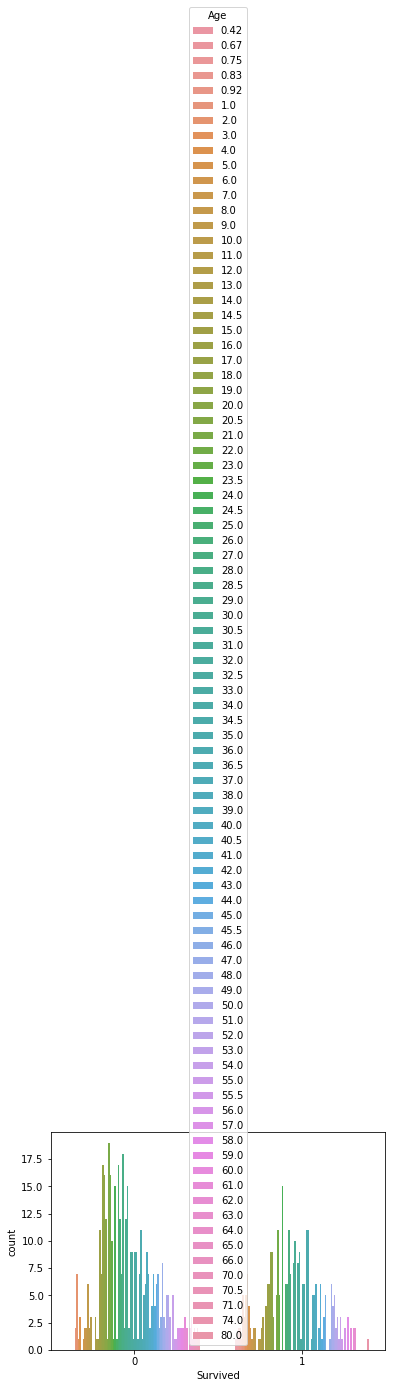

In [12]:
sns.countplot(x="Survived", hue="Age", data=train)

In [13]:
X_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Surname       0
Rest          0
Title         0
dtype: int64

In [14]:
X_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Surname       0
Rest          0
Title         0
dtype: int64

In [15]:
X_train.drop('Cabin', axis = 1, inplace = True)
X_test.drop('Cabin', axis = 1, inplace = True)

In [16]:
#Add Name Columns to X_train, X_test
X_train[['Surname', 'Rest', 'Title']] = Names_train[['Surname', 'Rest', 'Title']]
X_test[['Surname', 'Rest', 'Title']] = Names_test[['Surname', 'Rest', 'Title']]

In [17]:
train['Surname'] = X_train['Surname']

In [18]:
#Create a series of surnames with multiple family members in training set
train['Surname'] = X_train['Surname']
grouped=X_train.groupby(['Surname']).count()
grouped['Family Size'] = grouped['Pclass']
group = pd.DataFrame()
group['Family Size'] = grouped['Family Size']
dupids = grouped['Family Size'].where(grouped['Family Size'] > 1)
dupids.dropna(inplace = True)

grouped1 = X_test.groupby(['Surname']).count()
grouped1['Family Size'] = grouped1['Pclass']
group1 = pd.DataFrame()
group1['Family Size'] = grouped1['Family Size']
dupids1 = grouped['Family Size'].where(grouped1['Family Size'] > 1)
dupids1.dropna(inplace = True)

In [19]:
#assign 1 or 0 or -1 
frame = pd.DataFrame()

a = {} #train
for surname in dupids.index:
    s = train.loc[train['Surname'] == surname, 'Survived']
    means = np.mean(s)
    #print(means)
    #print(s.index)
    #print(surname)
    key = surname
    
    if np.mean(s) > 0:
        a[surname] = 1
        ##also can try
        #a[surname] = np.mean(s)
    else:
        a[surname] = 0

b = {} #test
for surname in dupids1.index:
    s1 = train.loc[train['Surname'] == surname, 'Survived']
    means = np.mean(s)
    key = surname
    if np.mean(s1) > 0:
        b[surname] = 1
        ##also can try
        #a[surname] = np.mean(s)
    else:
        b[surname] = 0


In [20]:
#check if any survivors for each surname in dictionary(a)
print(s)
print(s1)
#for surname in train['']

112    0
241    1
Name: Survived, dtype: int64
154    0
Name: Survived, dtype: int64


In [21]:
#Use Surname to check whether a person has a family member who survives
X_train['fam_surv'] = 2

for idx, surname in X_train['Surname'].iteritems():
    try:
        if a[surname] == 1:
            X_train.loc[idx, 'fam_surv'] = 1  
        else:
            X_train.loc[idx, 'fam_surv'] = -1  
    except KeyError:
        X_train.loc[idx, 'fam_surv'] = 0  
        pass   

In [22]:
#do same for test set
X_test['fam_surv'] = 2

for idx, surname in X_test['Surname'].iteritems():
    try:
        if a[surname] == 1:
            X_test.loc[idx, 'fam_surv'] = 1  
        else:
            X_test.loc[idx, 'fam_surv'] = -1  
    except KeyError:
        X_test.loc[idx, 'fam_surv'] = 0  
        pass   

In [23]:
X_train.drop(['Rest', 'Ticket', 'Surname', 'Name'], axis =1, inplace = True)
X_test.drop(['Rest', 'Ticket', 'Surname', 'Name'], axis =1, inplace = True)

In [24]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,fam_surv
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,Mr,1
2,1,0,38.0,1,0,71.2833,0,Mrs,0
3,3,0,26.0,0,0,7.9250,2,Miss,0
4,1,0,35.0,1,0,53.1000,2,Mrs,-1
5,3,1,35.0,0,0,8.0500,2,Mr,-1


In [25]:
group1 = X_train.groupby(['Title']).median()
group2 = X_test.groupby(['Title']).median()

In [26]:
titles = group1.index
for title in titles:
    age_to_impute = X_train.groupby('Title')['Age'].median()[title]
    X_train.loc[(X_train['Age'].isnull()) & (X_train['Title'] == title), 'Age'] = age_to_impute
    X_test.loc[(X_test['Age'].isnull()) & (X_test['Title'] == title), 'Age'] = age_to_impute

In [27]:
X_train.drop('Title', axis = 1, inplace = True)
X_test.drop('Title', axis =1, inplace = True)

In [28]:
X_train = pd.get_dummies(X_train, drop_first = True, columns = ['fam_surv', 'Embarked'])
X_test = pd.get_dummies(X_test, drop_first = True, columns = ['fam_surv', 'Embarked'])

In [29]:
X_test = X_test.fillna(method = 'ffill')

In [30]:
#feature scaling (X)
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [31]:
#Vanilla Logit Model
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
from sklearn.model_selection import cross_val_score
display(cross_val_score(logreg, X_train, y_train, cv=10))

array([0.78888889, 0.77777778, 0.7752809 , 0.80898876, 0.78651685,
       0.7752809 , 0.79775281, 0.79775281, 0.82022472, 0.82954545])

In [33]:
#Predicting the Test set results
y_pred = logreg.predict(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
#Lasso Regression Model
from sklearn import linear_model
lasso = LogisticRegression(C=1e5, penalty='l1')
lasso.fit(X_train, y_train)
display(cross_val_score(lasso, X_train, y_train, cv=10))

array([0.78888889, 0.77777778, 0.7752809 , 0.80898876, 0.78651685,
       0.7752809 , 0.79775281, 0.79775281, 0.82022472, 0.82954545])

In [35]:
#Predicting the Test set results
y_pred1 = lasso.predict(X_test) 

In [36]:
#Ridge Regression Model
ridge = linear_model.RidgeClassifier(alpha=0.5, fit_intercept=True)
ridge.fit(X_train, y_train)
display(cross_val_score(ridge, X_train, y_train, cv=10))

array([0.78888889, 0.77777778, 0.78651685, 0.86516854, 0.76404494,
       0.7752809 , 0.7752809 , 0.76404494, 0.83146067, 0.79545455])

In [37]:
y_pred2 = ridge.predict(X_test) 

In [38]:
#Writing to CSV 
#To check against solutions 
Subs = pd.read_csv('gender_submission.csv')
Subs = Subs.set_index('PassengerId')
Subs['Survived'] = y_pred
Subs.to_csv('Subs.csv')

# Evaluation of Models

Overall, it appears that Ridge Regression gives the best result. However, it has a higher amount of variance between the accuracies. And so, optimizing according to L2 is the best option for the data on this set. 

Also of note, I submitted my solutions to kaggle. The following are the results: 

Lasso = 0.7751
Ridge = 0.7608
Vanilla = 0.7751

It appears that the vanilla and Lasso model perform exactly the same with the same predictions. 
